# Preprocessing

Each wave must be preprocessed. This will include:
- Assigning labels according to the CESD-10 reporting scale
- Discretizing/classing continuous variables
- Feature Selection/Engineering
- Normalisation/Scaling

## Data Preparation

This includes:
1. Collecting each wave's .csv file
2. Renaming columns to make them more useable
3. Type fixing (Eg. Changing Date to datetime)
4. Incomplete data dropping (For the purpose of this Research, we only include data from participants who were 'Successfully Interviewed')

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotter
import importlib

from sklearn.utils import resample

import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
importlib.reload(plotter)

wave_num = 1

path_to_file = f"CSV/wave{wave_num}.csv"

df: pd.DataFrame = pd.read_csv(path_to_file)

# Selecting column names for CESD-10 Scale related features
cesd_col_names = ["_a_emobth", "_a_emomnd", "_a_emodep", "_a_emoeff", "_a_emohope",
                "_a_emofear", "_a_emoslp", "_a_emohap", "_a_emolone", "_a_emogo"]

new_df = pd.DataFrame({})

# Rename specific columns
df = df.rename(columns={'w1_a_gen': 'gender',
                        'w1_a_dob_y': 'birth_year',
                        'w1_a_popgrp': 'race',
                        'w1_a_marstt': 'marital_status',
                        'w1_a_brnprov': 'born_province',
                        'w1_a_mthali': 'parents_alive',
                        'w1_a_em1': 'employed',
                        'w1_a_edschgrd': 'highest_grade_school',
                        'w1_a_edter': 'tertiary_education',
                        'w1_a_ed07att': 'attended_courses',
                        'w1_a_ed08cur': 'currently_enrolled'})

outcome_str = f'w{wave_num}_a_outcome'
new_data = df[df[outcome_str] == 'Successfully Interviewed']
df = new_data

df

/tmp/ipykernel_135222/1677758297.py:7: DtypeWarning: Columns (11,14,18,30,38,77,133,134,135,137,138,139,140,141,142,143,145,146,147,148,149,150,151,153,154,155,156,157,158,159,161,162,163,164,165,166,167,169,170,171,172,175,177,178,179,180,183,219,223,235,236,237,238,239,240,241,242,247,251,254,261,264,265,267,269,271,277,283,291,292,293,294,295,296,297,298,299,301,309,311,313,315,317,319,321,323,325,327,329,331,333,337,339,341,343,345,347,350,358,362,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,407,408,417,418,419,427,428,429,440,441,442,443,447,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,470,471,472,477,478,479,481,482,483,490,491,492,493,510,512,516,518,522,523,525,528,529,531,532,534,535,537,538,540,549,552,553,564,567,569,571,572,573,576,578,580,590,591,594,599,601,641,654,658,660,662,668,671,672,693,731,789,790,791,792,793,800) have mixed 

,w1_hhid,pid,w1_a_outcome,w1_a_phase,w1_a_intrv_c,w1_a_intrv_imp,w1_a_intrv_d,w1_a_intrv_m,w1_a_intrv_y,w1_a_intrvsrt,...,w1_a_intlng5,w1_a_intlng6,w1_a_intlng_o,w1_a_intresp,w1_a_intrespact,w1_a_intresphear,w1_a_intrespque,w1_a_intresppid1,w1_a_intresppid2,w1_a_intresppid3
0,101012,314585,Successfully Interviewed,Phase One,184,Not Imputed,11.0,March,2008.0,1100.0,...,NaN,NaN,NaN,Neither hostile nor friendly,Missing,No other person within hearing range at any time,No,NaN,NaN,NaN
1,101013,314544,Successfully Interviewed,Phase One,143,Not Imputed,11.0,March,2008.0,950.0,...,NaN,NaN,NaN,Hostile,Not at all attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
2,101013,314550,Successfully Interviewed,Phase One,143,Not Imputed,11.0,March,2008.0,1409.0,...,NaN,NaN,NaN,Neither hostile nor friendly,Somewhat attentive,1+ persons within hearing range for all of the...,Yes,314544.0,NaN,NaN
3,101014,301454,Successfully Interviewed,Phase Two,225,Not Imputed,11.0,March,2008.0,1445.0,...,NaN,NaN,NaN,Neither hostile nor friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
5,101014,314580,Successfully Interviewed,Phase One,225,Not Imputed,11.0,March,2008.0,1415.0,...,NaN,NaN,NaN,Neither hostile nor friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,175185,311893,Successfully Interviewed,Phase Two,46,Not Imputed,27.0,November,2008.0,1640.0,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
16868,175198,310785,Successfully Interviewed,Phase Two,152,Not Imputed,29.0,November,2008.0,1107.0,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
16869,175202,302230,Successfully Interviewed,Phase Two,2,Not Imputed,29.0,November,2008.0,1245.0,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,Yes,310769.0,NaN,NaN
16870,175202,310769,Successfully Interviewed,Phase Two,152,Not Imputed,29.0,November,2008.0,1320.0,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN


## Feature Engineering

In [3]:
'''
PID : Integer

Uniquely identifes each participant. We have to include this to ensure that when deriving new columns, we index by pid.
So that each value in the new column is correctly associated with the partcipant
'''
new_df['pid'] = df['pid']

### Section B: Demographics

GENDER: Index(['Female', 'Male'], dtype='object') 
 [0 1]
RACE: Index(['African', 'Other', 'Asian/Indian', 'White', 'Coloured'], dtype='object') 
 [0 1 2 3 4]
MARITAL_STATUS: Index(['Widow/Widower', 'Married', 'Never Married', 'Divorced or separated',
       'Living with partner', 'Missing'],
      dtype='object') 
 [0 1 2 3 4 5]
15631
BORN_PROVINCE: Index(['Missing', 'Eastern Cape', 'KwaZulu-Natal', 'Mpumalanga', 'Free State',
       'Limpopo', 'Outside RSA', 'Gauteng', 'Western Cape', 'North West',
       'Northern Cape', 'Don't know'],
      dtype='object') 
 ['Missing' 'Eastern Cape' 'KwaZulu-Natal' 'Mpumalanga' 'Free State'
 'Limpopo' 'Outside RSA' 'Gauteng' 'Western Cape' 'North West'
 'Northern Cape' "Don't know"]
14452


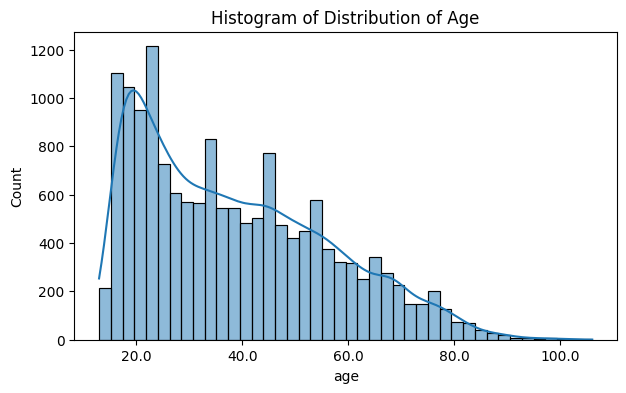

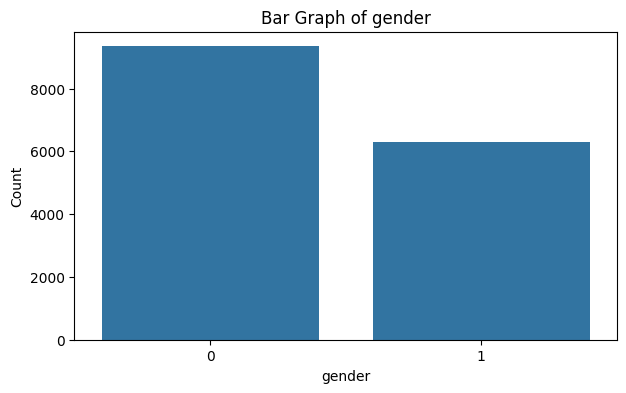

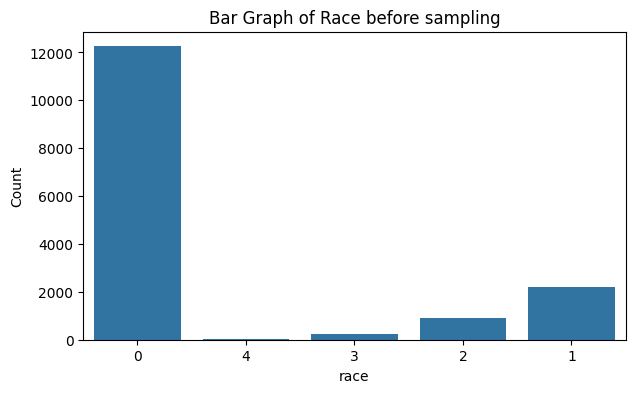

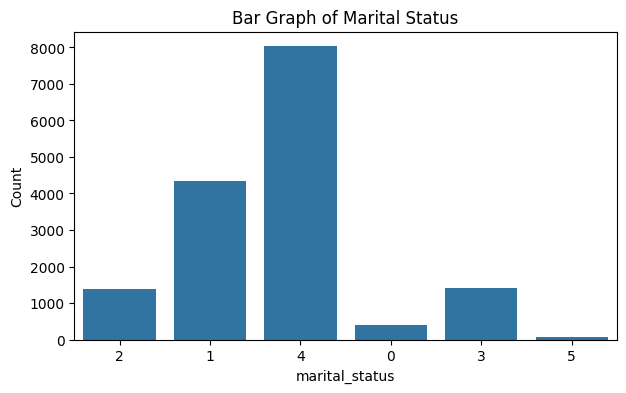

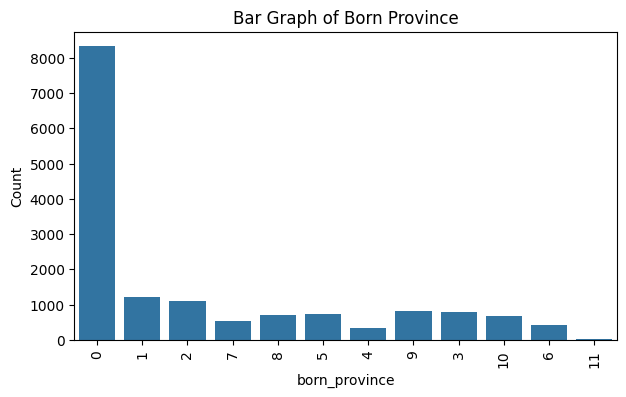

In [4]:
temp_df = pd.DataFrame({})

'''
AGE : Integer

Provides the age of the participant at the time of the interview.
'''
# Calculated age by taking interview year minus year of birth
years: pd.Series = df['birth_year'].replace('Missing', pd.NA).replace("Don't know", pd.NA).dropna()
df['age'] = df[f'w{wave_num}_a_intrv_y'] - years.astype(float)
new_df['age'] = df['age'].astype('Int32')

plotter.plot_histogram(new_df['age'], "Distribution of Age")

'''
GENDER : Integer (Class)

Factorizes gender.
'''
temp_df['gender'], getGender = pd.factorize(df['gender'])
print("GENDER:", getGender,"\n", temp_df['gender'].unique())

# fig, axs = plt.subplots(1, 2, figsize=(14, 4))
plotter.plot_bar(temp_df['gender'], title="gender", log_scale=False)

new_df['gender'] = temp_df['gender']

'''
RACE : Integer (Class)

Any nan or missing entries were replaced with the class "Other". This helps retain as much info as possible.
'''
# Combined Nan and Missing entries together as their own class and factorized
df['race'] = df['race'].replace(pd.NA, 'Other').replace('Missing', 'Other')
temp_df['race'], getRace = pd.factorize(df['race'])
print("RACE:", getRace,"\n", temp_df['race'].unique())

plotter.plot_bar(temp_df['race'], title="Race before sampling", log_scale=False)

new_df['race'] = temp_df['race']

# # I noticed from the bar graph that some classes are very under-represented
# # I decided to use random over sampling to duplicate entries to help represent the smaller classes better

# from sklearn.utils import resample

# # Concatenate the original DataFrame with new entries for minority classes
# df_minority = df[df['race'].isin([1, 2, 3, 4])]
# df_majority = df[df['race'] == 0]

# df_minority_upsampled = resample(df_minority, 
#                                 #  replace=True,     # Sample with replacement
#                                  n_samples=len(df_majority),    # To match the number of majority class
#                                  random_state=123) # For reproducibility

# df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# plotter.plot_bar(df_upsampled['race'], title="Race after sampling", log_scale=False)

# other_df : pd.DataFrame = {}
# other_df['race'] = df_upsampled['race']

'''
MARITAL_STATUS : Integer (Class)

Includes missing as an option/value.
'''
temp_df['marital_status'], getMaritalStatus = pd.factorize(df['marital_status'])
print("MARITAL_STATUS:", getMaritalStatus,"\n", temp_df['marital_status'].unique())

plotter.plot_bar(temp_df['marital_status'], title="Marital Status", log_scale=False)

new_df['marital_status'] = temp_df['marital_status']

'''
BORN_PROVINCE : Integer (Class)

Replaced missing values with don't know since it allows us to use more data without really skewing
'''
print(len(df['born_province']))
df['born_province'] = df['born_province'].replace(pd.NA, "Missing")
# df['born_province'] = df['born_province'].dropna()
temp_df['born_province'], getBornProvince = pd.factorize(df['born_province'])
print("BORN_PROVINCE:", getBornProvince,"\n", df['born_province'].unique())

plotter.plot_bar(temp_df['born_province'], title="Born Province", log_scale=False, rotation=90)

new_df['born_province'] = temp_df['born_province']
print(new_df['born_province'].count())

In [5]:
print(getBornProvince.__getitem__(-1))
print(getBornProvince.__getitem__(0))
print(getBornProvince.__getitem__(1))
print(getBornProvince.__getitem__(2))
print(getBornProvince.__getitem__(3))
print(getBornProvince.__getitem__(4))
print(getBornProvince.__getitem__(5))
print(getBornProvince.__getitem__(6))
print(getBornProvince.__getitem__(7))
print(getBornProvince.__getitem__(8))
print(getBornProvince.__getitem__(9))
print(getBornProvince.__getitem__(10))
print(getBornProvince.__getitem__(11))

Missing
Eastern Cape
KwaZulu-Natal
Mpumalanga
Free State
Limpopo
Outside RSA
Gauteng
Western Cape
North West
Northern Cape
Don't know
Missing


### Section C1: Children ever born (Only for Females)

### Section D: Parents’ education, living arrangements and vital status

### Section E: Labour market participation

### Exporting Dataframes to CSV files

In [ ]:
for i in cesd_col_names:
    new_df[f"w1{i}"] = df[f"w1{i}"]

new_df['w1_a_outcome'] = df['w1_a_outcome']
new_df['pid'] = df['pid']

# Assuming 'df' is your pandas DataFrame
new_df.to_csv('wave1_select.csv', index=False)

### Feature Selection

Each of the 5 waves will be converted into pandas dataframes. Waves 1, 3 and 5 will be used as training data. Waves 2 and 4 will be validation and testing data respectively.

Feature selection has been done as follows:
- Features relating to the CESD-10 reporting scale are selected.

In [ ]:
import pandas as pd
from typing import List

class Wave:
    def __init__(self, data: pd.DataFrame, select_cols: List[str]):
        self.data: pd.DataFrame = data
        self.select_cols: List[str] = select_cols
    
    def __str__(self):
        return str(self.data)

waves: List[Wave] = []

# CESD-10 Scale related features
cesd_col_names = ["_a_emobth", "_a_emomnd", "_a_emodep", "_a_emoeff", "_a_emohope",
                "_a_emofear", "_a_emoslp", "_a_emohap", "_a_emolone", "_a_emogo"]

# Scoring dictionaries
normal_scoring = {
    'Rarely or none of the time (less than 1 day)': 0,
    'Some or little of the time (1-2 days)': 1,
    'Occasionally or a moderate amount of time (3-4 days)': 2,
    'All of the time (5-7 days)': 3
}

reverse_scoring = {
    'Rarely or none of the time (less than 1 day)': 3,
    'Some or little of the time (1-2 days)': 2,
    'Occasionally or a moderate amount of time (3-4 days)': 1,
    'All of the time (5-7 days)': 0
}

# Loop through each wave
for i in range(1, 2):
    url = 'wave' + str(i) + '_select.csv'
    data = pd.read_csv(url)

    # Header text for each column based on wave
    header = 'w' + str(i)
    
    # Create the select columns
    select_cols = [header + col for col in cesd_col_names]

    # Drop rows where Interview Outcome is 'Refused/Not Available'
    outcome_str = header + '_a_outcome'
    new_data = data[data[outcome_str] == 'Successfully Interviewed']

    # Filter rows based on valid CESD answers
    cesd_valid_answers = ['Rarely or none of the time (less than 1 day)',
                          'Some or little of the time (1-2 days)',
                          'Occasionally or a moderate amount of time (3-4 days)',
                          'All of the time (5-7 days)']
    
    # Only keep rows where all select_cols have valid answers
    new_data = new_data[new_data[select_cols].isin(cesd_valid_answers).all(axis=1)]
    
    # Apply scoring to all CESD columns
    for idx, col in enumerate(select_cols):
        if idx == 4 or idx == 7:  # Reverse scoring for columns 5 and 8 (0-indexed as 4 and 7)
            new_data[col] = new_data[col].replace(reverse_scoring)
        else:
            new_data[col] = new_data[col].replace(normal_scoring)

    # Derive "Depressed" column: 1 if score >= 10, else 0
    new_data['score'] = new_data[select_cols].sum(axis=1)
    new_data['Depressed'] = (new_data['score'] >= 10).astype(int)

    # Append the wave object to the list
    wave = Wave(new_data, select_cols)
    waves.append(wave)


wave1_select.csv


### Labelling

Each participant was **labelled according to the CESD-10 reporting scale**.

In [ ]:
from tqdm import tqdm
import pandas as pd
from typing import List, Dict, Tuple
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Selecting column names for CESD-10 Scale related features
cesd_col_names = ["_a_emobth", "_a_emomnd", "_a_emodep", "_a_emoeff", "_a_emohope",
                "_a_emofear", "_a_emoslp", "_a_emohap", "_a_emolone", "_a_emogo"]

for wave in range(len(waves)):
    print(f"Wave {wave+1}:")
    data: pd.DataFrame = waves[wave].data
    select_cols = waves[wave].get_select_cols()

    # Dictionary to store the scores and depression status
    scores: Dict[str, Dict] = dict()

    # Series containing participant IDs
    participants = data['pid']

    # Counter for the number of participants flagged as depressed
    count_depressed = 0

    # Iterate over each participant
    for participant in tqdm(participants, desc="Labelling Participants"):
        score = 0
        depressed = False

        idx = data.index[data['pid'] == participant]

        # Sum the scores for all relevant columns
        for col in select_cols:
            value = data.at[idx[0], col]  # Accessing the value using participant ID and column name
            score += value

        # Determine if the participant is depressed based on the score
        if score >= 10:
            depressed = True
            count_depressed += 1

        # Map the participant ID to their score and depression status
        scores[participant] = {'score': int(score), 'Depressed': depressed}
    
    data['depression_score'] = 0

    for i in cesd_col_names:
        data['depression_score'] += data[f"w{wave+1}{i}"]
    
    # Create a new column 'new_column' based on a condition
    data['depressed'] = data['depression_score'].apply(lambda x: 1 if x >= 10 else 0)

    print(list(data['depressed']).count(1))

    data.to_csv('wave1_select_labelled.csv')
    # Print the total number of depressed participants
    print(f"Total Depressed Participants: {count_depressed}")
    print(f"Calculated Prevalence for Depression: {round(count_depressed/len(participants) * 100, 2)}%")



Wave 1:


Labelling Participants: 100%|██████████| 15342/15342 [00:02<00:00, 5132.24it/s]

5185
Total Depressed Participants: 5185
Calculated Prevalence for Depression: 33.8%


# Exploratory Data Analysis and Visualisation